In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [386]:
student_df = pd.read_csv('/content/drive/MyDrive/student_data.csv')

In [387]:
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [388]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [389]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [390]:
student_df['Average_Grade'] = student_df.loc[:,['G1','G2', 'G3']].sum(axis=1)
student_df['Average_Grade'] = student_df['Average_Grade'].map(lambda Average_Grade: Average_Grade / 3.)

In [391]:
analysis = student_df.iloc[:, 0:30]
analysis['Average_Grade'] = student_df['Average_Grade']

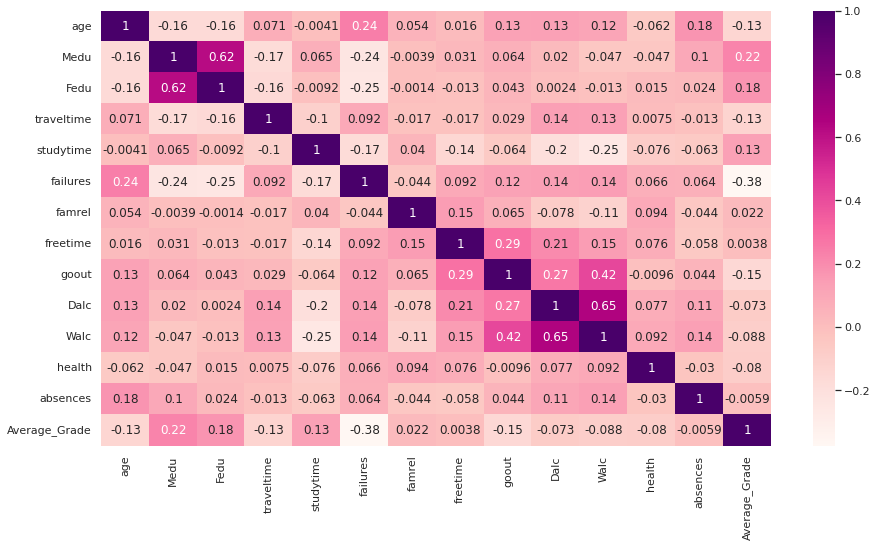

In [392]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(analysis.corr(), cmap = 'RdPu', annot = True)

There doesn't seem to be much correlation across the board with the highest being father education and the lowest being the amount of failures a person has. Male Education and Female Education having a high correlation alongside Weekly Alcohol Consumption being correlated with Daily Alcohol Consumption and go out.

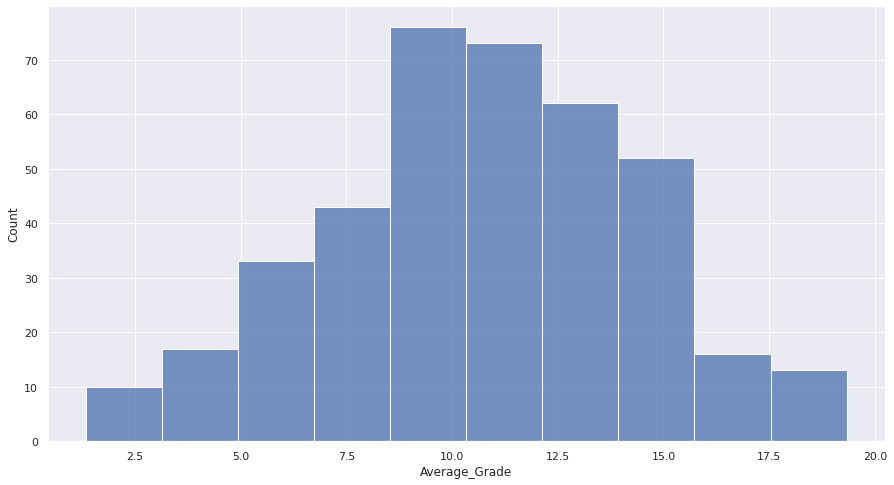

In [393]:
sns.histplot(x= 'Average_Grade', data= analysis, bins = 10)

The data is has a somewhat normal distribution. This means that an assumption of linear regression is fulfilled.

In [394]:
analysis['Average_Edu'] = analysis.loc[:,['Medu','Fedu']].sum(axis=1)
analysis['Average_Edu'] = analysis['Average_Edu'].map(lambda Average_Edu: Average_Edu / 2.)
analysis = analysis.drop(axis=1, columns=['Medu'])
analysis = analysis.drop(axis=1, columns=['Fedu'])
analysis = analysis.drop(axis=1, columns=['Walc'])
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school         395 non-null    object 
 1   sex            395 non-null    object 
 2   age            395 non-null    int64  
 3   address        395 non-null    object 
 4   famsize        395 non-null    object 
 5   Pstatus        395 non-null    object 
 6   Mjob           395 non-null    object 
 7   Fjob           395 non-null    object 
 8   reason         395 non-null    object 
 9   guardian       395 non-null    object 
 10  traveltime     395 non-null    int64  
 11  studytime      395 non-null    int64  
 12  failures       395 non-null    int64  
 13  schoolsup      395 non-null    object 
 14  famsup         395 non-null    object 
 15  paid           395 non-null    object 
 16  activities     395 non-null    object 
 17  nursery        395 non-null    object 
 18  higher    

All problematic features were removed. Medu and Fedu by combining the two into an average, and Walc was straight up removed.

In [395]:
analysis = pd.get_dummies(data= analysis, columns= ['internet', 'famsize', 'schoolsup'])
analysis = analysis.drop(axis=1, columns=['freetime'])

Seeing that freetime didn't have much correlation with Grades, it was dropped to remove noisy data. Internet, family size, and school support were used for get_dummies as these are all factors that should realistically effect a student's grade.

In [396]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school         395 non-null    object 
 1   sex            395 non-null    object 
 2   age            395 non-null    int64  
 3   address        395 non-null    object 
 4   Pstatus        395 non-null    object 
 5   Mjob           395 non-null    object 
 6   Fjob           395 non-null    object 
 7   reason         395 non-null    object 
 8   guardian       395 non-null    object 
 9   traveltime     395 non-null    int64  
 10  studytime      395 non-null    int64  
 11  failures       395 non-null    int64  
 12  famsup         395 non-null    object 
 13  paid           395 non-null    object 
 14  activities     395 non-null    object 
 15  nursery        395 non-null    object 
 16  higher         395 non-null    object 
 17  romantic       395 non-null    object 
 18  famrel    

In [397]:
analysis = analysis.select_dtypes(exclude=['object'])

This was done to remove all remaining objects in the program because the machine learning algorithm couldn't process them.

In [398]:
analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            395 non-null    int64  
 1   traveltime     395 non-null    int64  
 2   studytime      395 non-null    int64  
 3   failures       395 non-null    int64  
 4   famrel         395 non-null    int64  
 5   goout          395 non-null    int64  
 6   Dalc           395 non-null    int64  
 7   health         395 non-null    int64  
 8   absences       395 non-null    int64  
 9   Average_Grade  395 non-null    float64
 10  Average_Edu    395 non-null    float64
 11  internet_no    395 non-null    uint8  
 12  internet_yes   395 non-null    uint8  
 13  famsize_GT3    395 non-null    uint8  
 14  famsize_LE3    395 non-null    uint8  
 15  schoolsup_no   395 non-null    uint8  
 16  schoolsup_yes  395 non-null    uint8  
dtypes: float64(2), int64(9), uint8(6)
memory usage: 36.4 K

In [399]:
x = analysis
x = x.drop(axis=1, columns=['Average_Grade'])
y= analysis['Average_Grade']

In [400]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .2, random_state = 50)

In [401]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
#Bagging
rf = RandomForestRegressor(n_estimators= 10)
bag_clf = BaggingRegressor(base_estimator=rf, n_estimators=100, bootstrap= True, random_state= 50)
bag_clf.fit(x_train, y_train)
pred = bag_clf.predict(x_test)

Random Forest Regressor alongside a bagging method was chosen to enhance the accuracy. RFR was chosen specifically because I felt that the data wasn't going to be linear enough to have a high accuracy just by using linear regression.

In [402]:
from sklearn import metrics
metrics.r2_score(y_test, pred)

0.2596894392903367

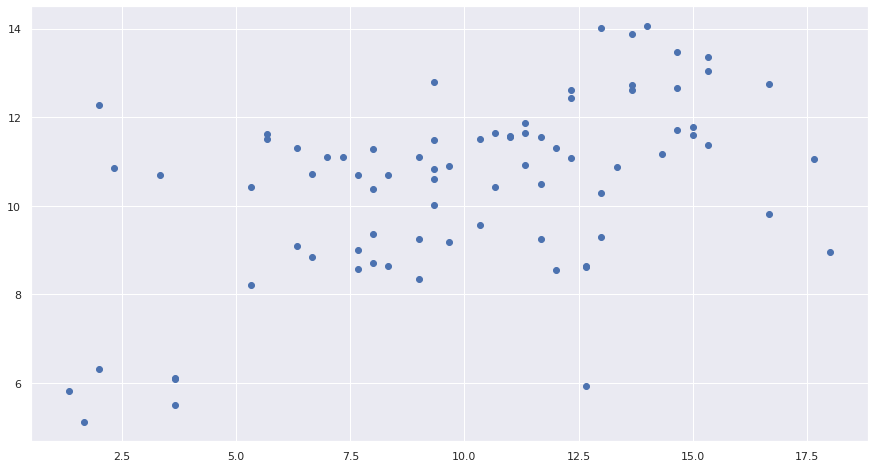

In [403]:
plt.scatter(y_test, pred)
plt.xlabel = ('y-test')
plt.ylabel = ('predictions')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


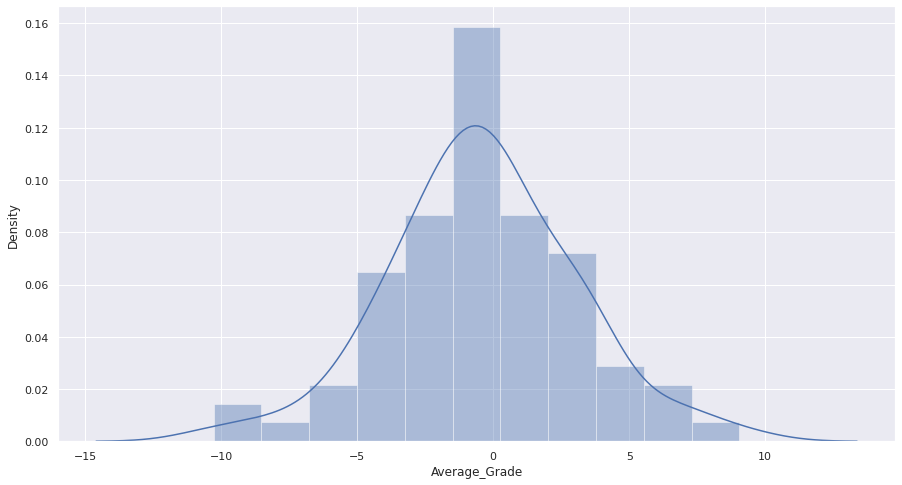

In [404]:
sns.distplot(y_test - pred)

These two graphs were to help visualize the results of the algorithm.

In [405]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
bag_clf_lr = BaggingRegressor(base_estimator=lr, n_estimators=100, bootstrap= True, random_state= 50)
bag_clf_lr.fit(x_train, y_train)
pred = bag_clf_lr.predict(x_test)

This was a test to see if my prediction was correct. This used bagging as well, except the base algorithm was linear regression. The lower accuracy proved that a nonlinear approach was correct.

In [406]:
metrics.r2_score(y_test, pred)

0.1992936521971661